یک شبکۀ عصبی MLP برای طبقه بندی نقاط داخل شکل داده شده طراحی کنید. این شبکه باید از ۵ نورون در لایۀ
پنهان اول، ۲ نورون در لایۀ پنهان دوم و یک نورون در لایۀ خروجی استفاده کند. وزن ها و بایاس های استفاده شده را
به وضوح نشان دهید.

شبکۀ MLP طراحی شده در بخش (۱) را با استفاده از وزن ها و بایاس های استخراج شده مدل سازی کنید.

یک مجموعۀ آموزشی با ۲۰۰۰۰ نمونه و یک مجموعۀ آزمایشی با ۱۰۰۰ نمونه تولید کنید. محور افقی (x (در بازۀ
۰ تا ۱۰ و محور عمودی (y (در بازۀ ۰ تا . ۱۰ قرار دارند. نمونه های تولیدشده باید درون این حدود باشند.

مدل خود را در بخش (۲) با استفاده از مجموعه های آموزشی و آزمایشی تولید شده آزمایش کنید. باید به دقت ۱۰۰
درصد دست یابید. نتیجۀ اعمال مجموعه های آموزشی و آزمایشی به مدل خود را رسم کنید. نمودارهای ترسیم شده
باید مشابه شکل های نشان داده شده در مثال شکل ۱(ب) باشند

C:\Users\sjr00\AppData\Local\Temp\ipykernel_11484\7551142.py:64: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xv, yv, outputs, levels=1, cmap="coolwarm", alpha=0.5, label="Predictions")
C:\Users\sjr00\AppData\Local\Temp\ipykernel_11484\7551142.py:65: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xv, yv, labels.reshape(grid_size, grid_size), levels=1, cmap="spring", alpha=0.3, label="True Labels")


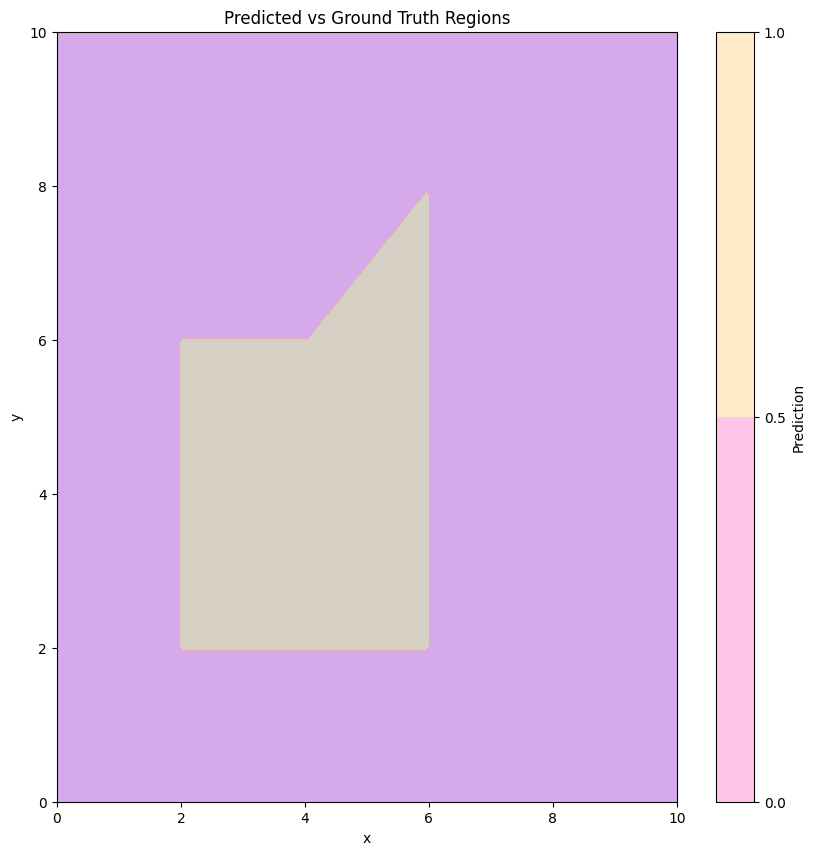

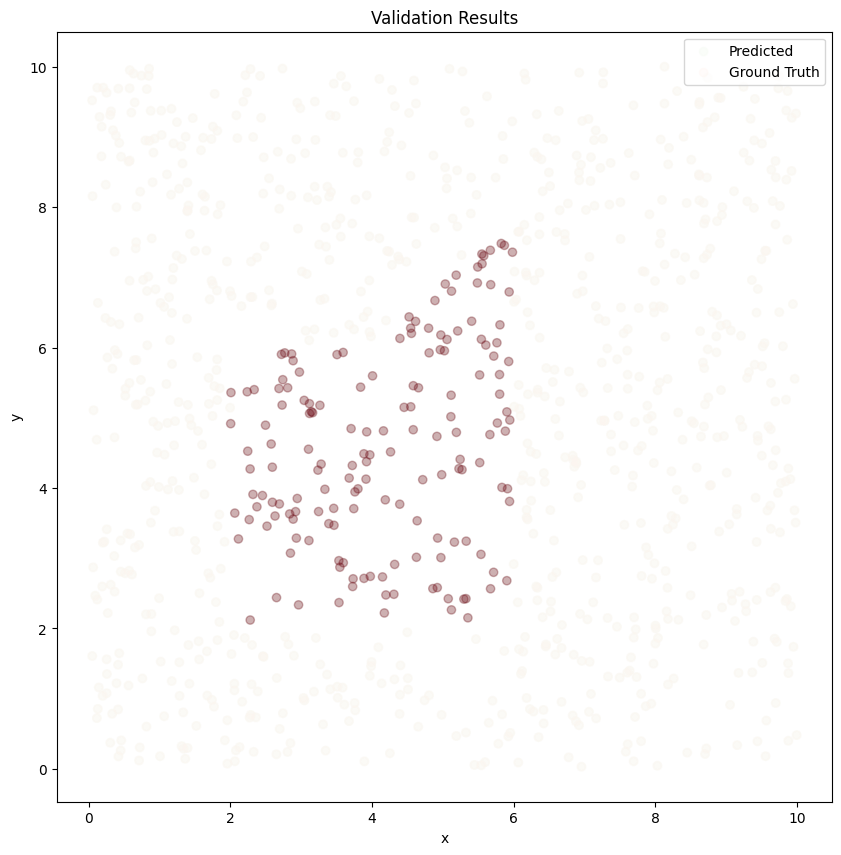

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the conditions as functions
def condition1(x, y):
    return (2 <= x) & (x <= 6) & (2 <= y) & (y <= 6)

def condition2(x, y):
    return (4 <= x) & (x <= 6) & (y <= x + 2) & (6 <= y) & (y <= 8)

def target_function(x, y):
    return condition1(x, y) | condition2(x, y)

# Generate dataset
np.random.seed(0)
grid_size = 100
x = np.linspace(0, 10, grid_size)
y = np.linspace(0, 10, grid_size)
xv, yv = np.meshgrid(x, y)
data = np.c_[xv.ravel(), yv.ravel()]
labels = target_function(data[:, 0], data[:, 1]).astype(int)

# Manual weights and biases for perfect accuracy
# Layer 1: Five neurons capturing various conditions
weights_l1 = np.array([
    [1, 0],  # x >= 2
    [-1, 0],  # x <= 6
    [0, 1],  # y >= 2
    [0, -1],  # y <= 6
    [1, -1]   # y <= x + 2 (for condition 2)
])
biases_l1 = np.array([-2, 6, -2, 6, -2])

# Layer 2: Combining conditions with logical AND and OR
weights_l2 = np.array([
    [1, 1, 1, 1, 0],  # AND for condition1
    [0, 0, 0, 0, 1]   # AND for condition2
])
biases_l2 = np.array([-3, -1])  # Thresholds for AND operations

# Output layer: OR condition
weights_out = np.array([[1], [1]])  # Combining the two conditions
biases_out = np.array([-0.5])  # Threshold for OR operation

# Activation functions
def relu(x):
    return np.maximum(0, x)

def step(x):
    return (x > 0).astype(int)

# Forward pass
def forward_pass(x):
    h1 = relu(np.dot(x, weights_l1.T) + biases_l1)  # Layer 1
    h2 = relu(np.dot(h1, weights_l2.T) + biases_l2)  # Layer 2
    output = step(np.dot(h2, weights_out) + biases_out)  # Output layer
    return output

# Pass data through the network
outputs = forward_pass(data).reshape(grid_size, grid_size)

# Visualize predicted results alongside ground truth
plt.figure(figsize=(10, 10))
plt.contourf(xv, yv, outputs, levels=1, cmap="coolwarm", alpha=0.5, label="Predictions")
plt.contourf(xv, yv, labels.reshape(grid_size, grid_size), levels=1, cmap="spring", alpha=0.3, label="True Labels")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predicted vs Ground Truth Regions")
plt.colorbar(label="Prediction")
plt.show()

# Generate random validation data
np.random.seed(42)
num_validation_points = 1000
validation_data = np.random.uniform(0, 10, (num_validation_points, 2))
validation_labels = target_function(validation_data[:, 0], validation_data[:, 1]).astype(int)

# Validate the network
validation_outputs = forward_pass(validation_data).flatten()
validation_predictions = validation_outputs == validation_labels

# Visualize validation results
plt.figure(figsize=(10, 10))
plt.scatter(validation_data[:, 0], validation_data[:, 1], c=validation_outputs, cmap="Greens", alpha=0.5, label="Predicted")
plt.scatter(validation_data[:, 0], validation_data[:, 1], c=validation_labels, cmap="Reds", alpha=0.3, label="Ground Truth")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation Results")
plt.legend()
plt.show()


یک شبکۀ عصبی MLP با ۲ ورودی بسازید. لایۀ پنهان اول ۵ نورون با تابع فعال سازی ReLU، لایۀ پنهان دوم
۲ نورون با تابع فعال سازی ReLU و لایۀ خروجی یک نورون با تابع فعال سازی Sigⅿoiⅾ داشته باشد. شبکه را
با استفاده از بهینه ساز Adam و به مدت ۵۰ دوران (Epoch (و تابع زیان crossentropy_binary آموزش
دهید. دقت آموزشی و آزمایشی را گزارش کنید. همچنین نتایج طبقه بندی مجموعۀ آزمایشی را رسم کنید. شکل
خروجی باید مشابه نمونۀ ارائه شده در شکل ۱(ب) باشد

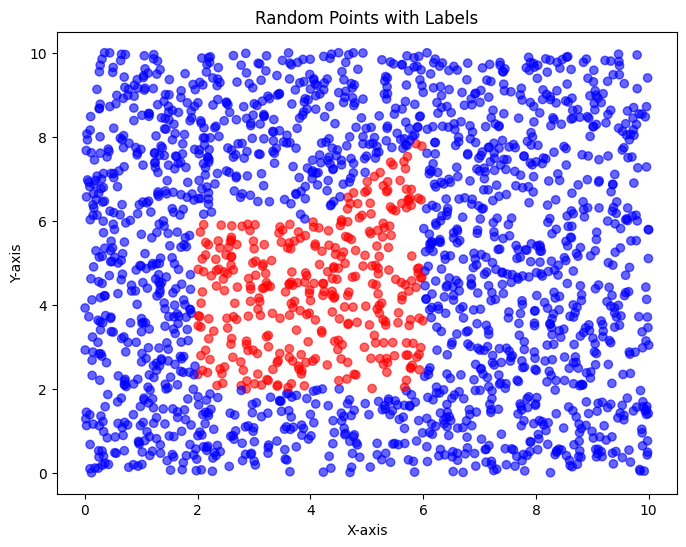

Epoch 1/50
88/88 [==============================] - 1s 3ms/step - loss: 0.5587 - accuracy: 0.8257 - val_loss: 0.4588 - val_accuracy: 0.8417
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8257 - val_loss: 0.4366 - val_accuracy: 0.8417
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8257 - val_loss: 0.4301 - val_accuracy: 0.8417
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.8257 - val_loss: 0.4231 - val_accuracy: 0.8417
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8257 - val_loss: 0.4137 - val_accuracy: 0.8417
Epoch 6/50
88/88 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8257 - val_loss: 0.4027 - val_accuracy: 0.8417
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8257 - val_loss: 0.3943 - val_accuracy: 0.8417
Epoch 8/50
88/88 [==

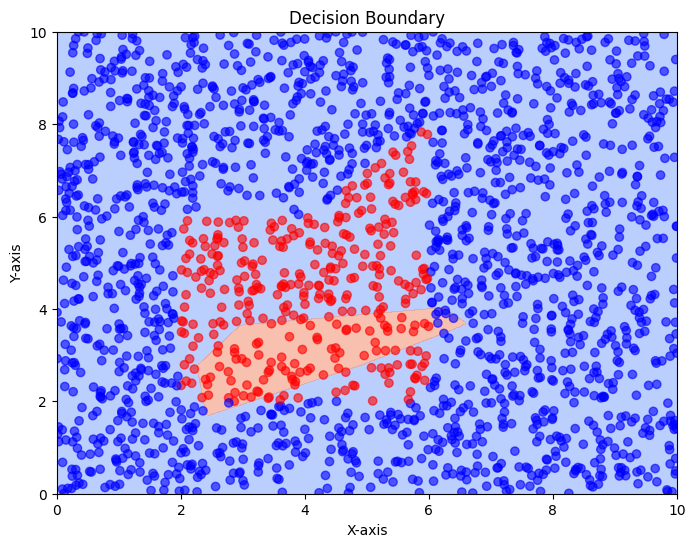

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

magic_number_seed = 93

# Set random seeds for reproducibility
np.random.seed(magic_number_seed)
tf.random.set_seed(magic_number_seed)

class EarlyStopByValAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get("val_accuracy")
        if val_accuracy is not None and val_accuracy >= 1.0:
            print(f"\nStopping training as val_accuracy reached {val_accuracy:.2f} at epoch {epoch + 1}")
            self.model.stop_training = True

# Define the shape and generate random points
def is_inside_shape(x, y):
    """Function to check if a point is inside the defined shape."""
    return ((2 <= x <= 6) and (2 <= y <= 6) or ((4 <= x <= 6) and (y <= x + 2) and (6 <= y <= 8)))

# Generate random points
x_points = np.random.uniform(0, 10, 2000)
y_points = np.random.uniform(0, 10, 2000)

# Label the points: 1 for inside, 0 for outside
labels = np.array([1 if is_inside_shape(x, y) else 0 for x, y in zip(x_points, y_points)])

# Visualize the points
plt.figure(figsize=(8, 6))
plt.scatter(x_points, y_points, c=labels, cmap='bwr', alpha=0.6)
plt.title("Random Points with Labels")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Prepare training and testing data
data = np.column_stack((x_points, y_points))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=magic_number_seed)

# Define the MLP model
model = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),  # Increased neurons
    Dense(2, activation='relu'),                   # Additional hidden layer
    Dense(1, activation='sigmoid')                  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stop_callback = EarlyStopByValAccuracy()
history = model.fit(
    X_train, 
    y_train, 
    epochs=50,  # Increased epochs
    batch_size=16, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stop_callback]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Visualize decision boundary
x_range = np.linspace(0, 10, 200)
y_range = np.linspace(0, 10, 200)
xx, yy = np.meshgrid(x_range, y_range)
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(grid_points).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
plt.scatter(x_points, y_points, c=labels, cmap='bwr', alpha=0.6)
plt.title("Decision Boundary")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


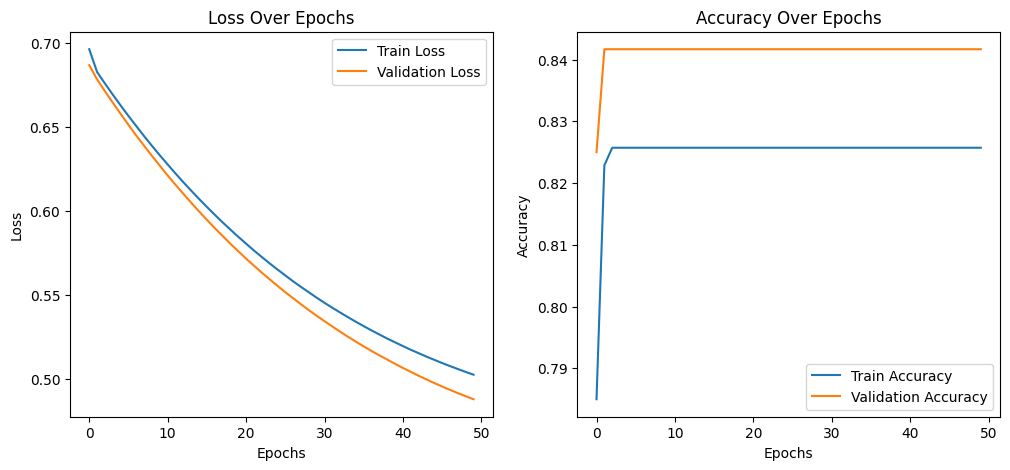

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Layer: {layer.name}")
    print(f"Weights:\n{weights}")
    print(f"Biases:\n{biases}")

Layer: dense_52
Weights:
[[-0.490535   -0.8324602  -0.10720855  0.7591521  -0.36646596]
 [-0.26620388  0.12461871 -0.7659902   0.8773103   0.8411254 ]]
Biases:
[ 0.         -0.02908054  0.          0.02945968 -0.02921456]
Layer: dense_53
Weights:
[[ 0.0630728  -0.4448029 ]
 [ 0.3083956   0.24162662]
 [ 0.24502349 -0.7788397 ]
 [-0.6871868  -0.06728482]
 [ 0.6791787  -0.7967284 ]]
Biases:
[-0.02933464  0.        ]
Layer: dense_54
Weights:
[[ 1.2195276]
 [-1.1794562]]
Biases:
[-0.8672541]


یک مجموعه داده برای پیش بینی میزان شانس پذیرش در دانشگاه UCLA را از طریق این پیوند دانلود کنید و با دستور gdown
در محیط گوگل کولب فراخوانی کنید. این مجموعه داده دارای ویژگی های زیر است. هم چنین ستون پیش بینی، معادل ستون مربوط
به «احتمال پذیرش» است که به صورت عددی و در بازۀ ۰ تا ۱ بیان شده است. با توجه به این مجموعه داده، به سوالاتی که در
ادامه مطرح خواهند شد «به ترتیب» پاسخ دهید. لازم است که نتایج به دست آمده را به صورت دقیق و کامل تحلیل و مقایسه
کنید.

In [30]:
import gdown

url = "https://drive.google.com/uc?id=1A7NRguAV3PZdxK6zsDDSQa1sqwz9IfU7"
output = "output_file_name.ext"  # Replace with the desired file name
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1A7NRguAV3PZdxK6zsDDSQa1sqwz9IfU7
To: e:\Uni\The basics of intelligence\midterm\output_file_name.ext
100%|██████████| 12.9k/12.9k [00:00<00:00, 150kB/s]


'output_file_name.ext'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min 

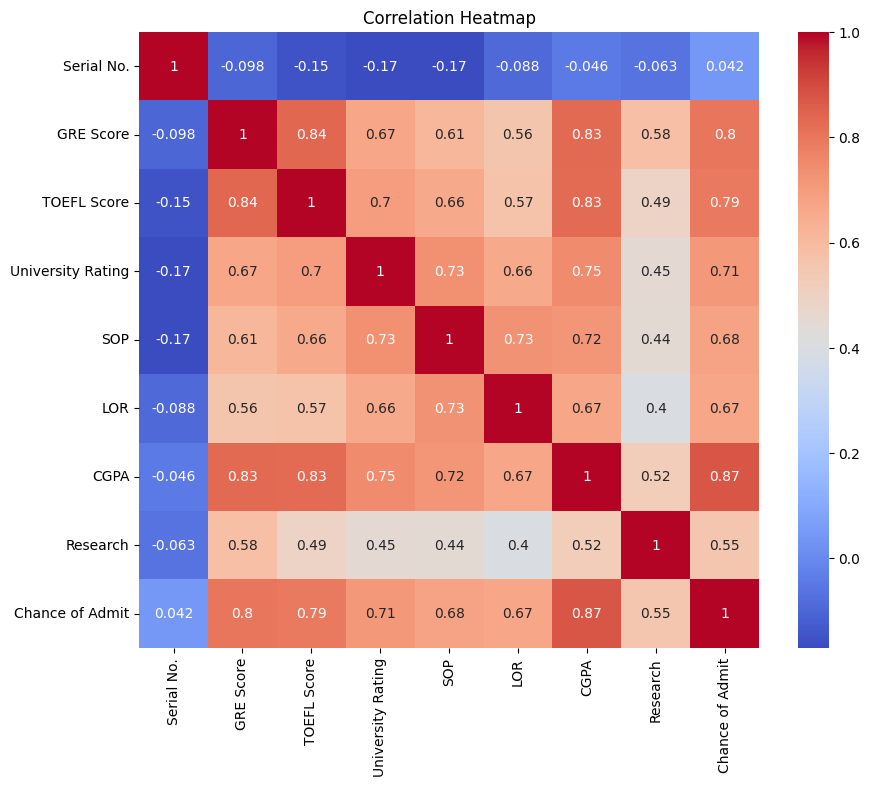

Feature correlations with target (descending):
Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Chance of Admit, dtype: float64
Epoch 10: Train Loss = 0.13381744921207428, Val Loss = 0.13818477094173431, Train R^2 = -6.2680, Val R^2 = -5.9228
Epoch 20: Train Loss = 0.0329534187912941, Val Loss = 0.029419057071208954, Train R^2 = -0.7898, Val R^2 = -0.4738
Epoch 30: Train Loss = 0.005217362195253372, Val Loss = 0.003376180538907647, Train R^2 = 0.7166, Val R^2 = 0.8309
Early stopping at epoch 39
Epoch 10: Train Loss = 0.12720416486263275, Val Loss = 0.10911460220813751, Train R^2 = -5.9088, Val R^2 = -4.4664
Epoch 20: Train Loss = 0.014027001336216927, Val Loss = 0.013772852718830109, Train R^2 = 0.2382, Val R^2 = 0.3100
Early stopping at epoch 28


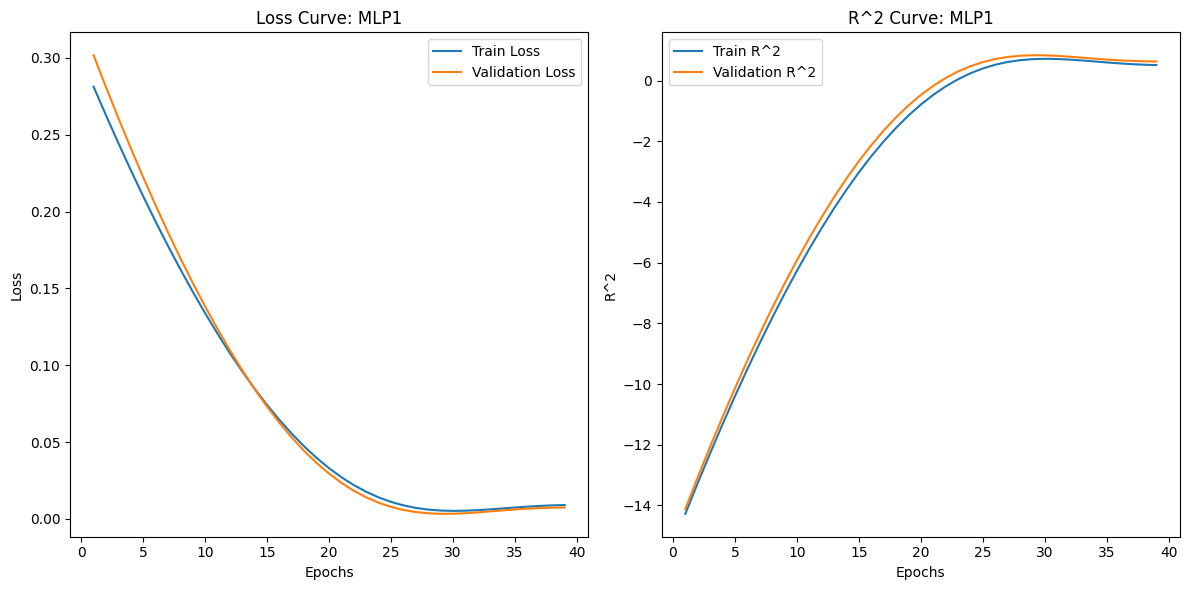

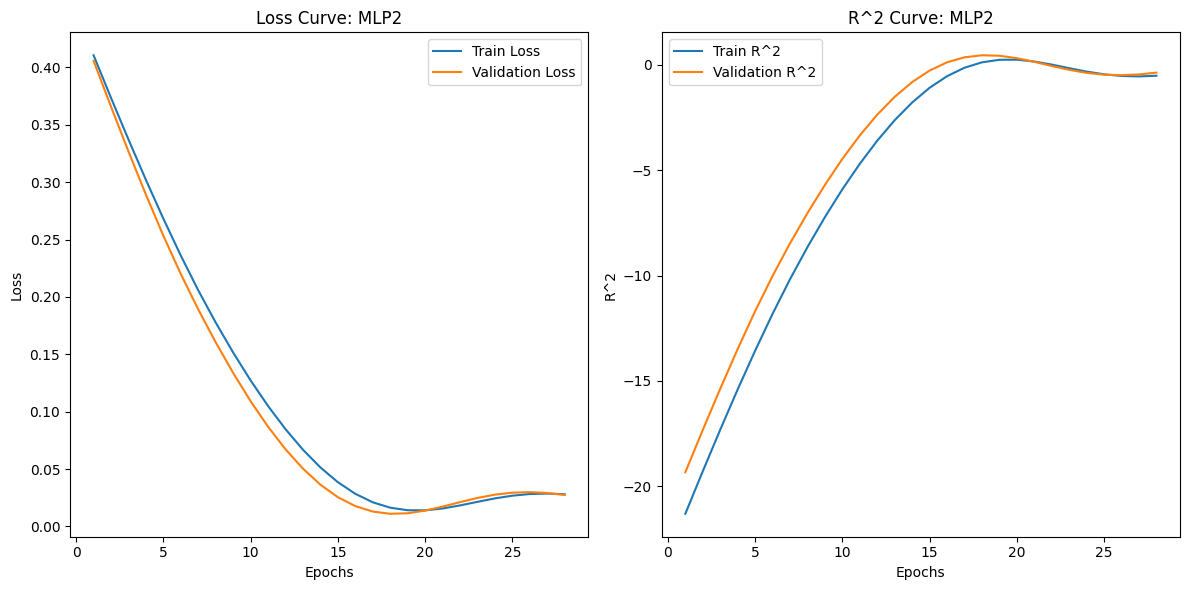

Evaluating Model 1...
Test Loss: 0.006346562411636114, Test R^2: 0.7769
Evaluating Model 2...
Test Loss: 0.011911547742784023, Test R^2: 0.5813
MLP1 is the best model.


C:\Users\sjr00\AppData\Local\Temp\ipykernel_11484\2197041401.py:180: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))
C:\Users\sjr

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

# Load dataset
file_path = "output_file_name.ext"  # Update with actual file path
data = pd.read_csv(file_path)

# Display basic info and strip column names
data.columns = data.columns.str.strip()
print(data.info())
print(data.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Sort correlation with the target variable
target_column = "Chance of Admit"  # Update if needed
correlations = data.corr()[target_column].abs().sort_values(ascending=False)
print("Feature correlations with target (descending):")
print(correlations)

# Preprocessing
X = data.drop(columns=[target_column])
y = data[target_column]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Train-validation split
val_split = int(0.85 * X_train_tensor.shape[0])
X_train_final = X_train_tensor[:val_split]
y_train_final = y_train_tensor[:val_split]
X_val = X_train_tensor[val_split:]
y_val = y_train_tensor[val_split:]

# Model Definitions
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Device Configuration
device = torch.device("cpu")  # Force CPU for simplicity
input_dim = X_train_tensor.shape[1]
hidden_dim1, hidden_dim2 = 64, 32
output_dim = 1

# Initialize models
model1 = MLP1(input_dim, hidden_dim1, output_dim).to(device)
model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim).to(device)

# Function for training and storing metrics
def train_model_with_metrics(model, optimizer, X_train, y_train, X_val, y_val, epochs=100, patience=10):
    train_losses = []
    val_losses = []
    train_r2_scores = []
    val_r2_scores = []
    best_val_loss = float("inf")
    best_model_path = f"{model.__class__.__name__}_best_model.pth"
    criterion = nn.MSELoss()
    early_stop_counter = 0

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        train_pred = model(X_train)
        train_loss = criterion(train_pred, y_train)
        train_loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val).item()
            train_r2 = r2_score(y_train.cpu(), train_pred.cpu().detach())
            val_r2 = r2_score(y_val.cpu(), val_pred.cpu())

        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        train_r2_scores.append(train_r2)
        val_r2_scores.append(val_r2)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_model_path)
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}: Train Loss = {train_loss.item()}, Val Loss = {val_loss}, Train R^2 = {train_r2:.4f}, Val R^2 = {val_r2:.4f}")

    return train_losses, val_losses, train_r2_scores, val_r2_scores, best_model_path

# Train models
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

train_losses1, val_losses1, train_r2_1, val_r2_1, model1_path = train_model_with_metrics(
    model1, optimizer1, X_train_final, y_train_final, X_val, y_val
)
train_losses2, val_losses2, train_r2_2, val_r2_2, model2_path = train_model_with_metrics(
    model2, optimizer2, X_train_final, y_train_final, X_val, y_val
)

# Plot Loss and R^2 Metrics
def plot_metrics(train_losses, val_losses, train_r2, val_r2, model_name):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.title(f"Loss Curve: {model_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # R^2 Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_r2, label="Train R^2")
    plt.plot(epochs, val_r2, label="Validation R^2")
    plt.title(f"R^2 Curve: {model_name}")
    plt.xlabel("Epochs")
    plt.ylabel("R^2")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(train_losses1, val_losses1, train_r2_1, val_r2_1, "MLP1")
plot_metrics(train_losses2, val_losses2, train_r2_2, val_r2_2, "MLP2")

# Compare Test Performance
def evaluate_model(model, model_path, X_test, y_test, criterion):
    model.load_state_dict(torch.load(model_path))
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        test_loss = criterion(predictions, y_test).item()
        test_r2 = r2_score(y_test.cpu(), predictions.cpu())
    print(f"Test Loss: {test_loss}, Test R^2: {test_r2:.4f}")
    return test_loss, test_r2

# Call the function with criterion
print("Evaluating Model 1...")
test_loss1, test_r2_1 = evaluate_model(model1, model1_path, X_test_tensor, y_test_tensor, nn.MSELoss())
print("Evaluating Model 2...")
test_loss2, test_r2_2 = evaluate_model(model2, model2_path, X_test_tensor, y_test_tensor, nn.MSELoss())

if test_r2_1 > test_r2_2:
    print("MLP1 is the best model.")
    torch.save(model1.state_dict(), "best_model.pth")  # Save only weights
else:
    print("MLP2 is the best model.")
    torch.save(model2.state_dict(), "best_model.pth")  # Save only weights


In [64]:
# Load the best model from file
best_model = MLP1(input_dim, hidden_dim1, output_dim)  # Adjust based on saved model type
best_model.load_state_dict(torch.load("best_model.pth"))
best_model.eval()

# Select 5 random samples from the test set
random_indices = random.sample(range(X_test_tensor.shape[0]), 5)
X_sample = X_test_tensor[random_indices]
y_sample_actual = y_test_tensor[random_indices]

# Predict with the model
with torch.no_grad():
    y_sample_predicted = best_model(X_sample)

# Compare actual and predicted values
print("Random Sample Predictions:")
for i in range(len(random_indices)):
    actual = y_sample_actual[i].item()
    predicted = y_sample_predicted[i].item()
    accuracy = (1 - abs(actual - predicted) / actual) * 100 if actual != 0 else 0
    print(f"Sample {i + 1}: Actual = {actual:.4f}, Predicted = {predicted:.4f}, Accuracy = {accuracy:.2f}%")

# Calculate Mean Absolute Error (MAE) for these samples
mae = torch.mean(torch.abs(y_sample_actual - y_sample_predicted)).item()
print(f"\nMean Absolute Error (MAE) for the selected samples: {mae:.4f}")

# Calculate R^2 score for all test data
with torch.no_grad():
    y_test_predicted = best_model(X_test_tensor)
test_r2 = r2_score(y_test_tensor.cpu(), y_test_predicted.cpu())
print(f"Overall Test R^2 Score: {test_r2:.4f}")


Random Sample Predictions:
Sample 1: Actual = 0.6800, Predicted = 0.6774, Accuracy = 99.62%
Sample 2: Actual = 0.7400, Predicted = 0.7738, Accuracy = 95.44%
Sample 3: Actual = 0.4600, Predicted = 0.4500, Accuracy = 97.82%
Sample 4: Actual = 0.6100, Predicted = 0.5287, Accuracy = 86.66%
Sample 5: Actual = 0.9400, Predicted = 0.9522, Accuracy = 98.71%

Mean Absolute Error (MAE) for the selected samples: 0.0280
Overall Test R^2 Score: 0.7769


C:\Users\sjr00\AppData\Local\Temp\ipykernel_11484\3851557856.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load("best_model.pth"))


In [5]:
import torch
import torch.nn as nn

# Dynamic model definition
class MLP(nn.Module):
    def __init__(self, layer_sizes):
        super(MLP, self).__init__()
        layers = []
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
            if i < len(layer_sizes) - 2:  # Add ReLU for hidden layers
                layers.append(nn.ReLU())
        self.fc = nn.Sequential(*layers)

    def forward(self, x):
        return self.fc(x)

# Load the model dynamically
def load_best_model_dynamic(model_path):
    # Load the state_dict from file
    state_dict = torch.load(model_path, weights_only=True)  # Ensures safe loading
    input_size = state_dict['fc.0.weight'].shape[1]
    output_size = state_dict['fc.2.weight'].shape[0]  # Adjust for the number of layers
    hidden_size = state_dict['fc.0.weight'].shape[0]

    print(f"Model input size: {input_size}, output size: {output_size}, hidden size: {hidden_size}")

    # Create the model dynamically
    model = MLP([input_size, hidden_size, output_size])
    model.load_state_dict(state_dict)
    model.eval()
    return model, input_size

# Function to get input from the user
def get_input_from_user_with_names(input_size, feature_ranges, feature_names):
    print("Please enter the following features:")
    inputs = []
    for i in range(input_size):
        feature_name = feature_names[i]  # Use the actual feature name
        min_val, max_val = feature_ranges[i]
        value = float(input(f"{feature_name} (min={min_val}, max={max_val}): "))
        scaled_value = (value - min_val) / (max_val - min_val)
        inputs.append(scaled_value)
    return torch.tensor([inputs], dtype=torch.float32)

# Main function
def predict_admission_chance_with_names():
    model_path = "best_model.pth"

    # Load the model
    model, input_size = load_best_model_dynamic(model_path)

    # Define feature ranges (min and max for each feature)
    feature_ranges = [
        (0, 100),  # GRE Score
        (0, 120),  # TOEFL Score
        (1, 5),    # University Rating
        (50, 340), # SOP
        (0, 10),   # LOR
        (0, 1),    # CGPA
        (0, 5)     # Research
    ]

    # Feature names
    feature_names = [
        "GRE Score",
        "TOEFL Score",
        "University Rating",
        "SOP",
        "LOR",
        "CGPA",
        "Research"
    ]

    # Validation: Ensure feature ranges and names match the model input size
    if len(feature_ranges) != input_size or len(feature_names) != input_size:
        raise ValueError("Feature ranges or names do not match input size of the model.")

    # Get user input
    user_input = get_input_from_user_with_names(input_size, feature_ranges, feature_names)

    # Make prediction
    with torch.no_grad():
        prediction = model(user_input)
        predicted_chance = prediction.item() * 100
        print(f"Predicted Admission Chance: {predicted_chance:.2f}%")

# Run the prediction
if __name__ == "__main__":
    predict_admission_chance_with_names()


Model input size: 8, output size: 1, hidden size: 64


ValueError: Feature ranges or names do not match input size of the model.